In [2]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
rawOpportunities = pd.read_csv("Data/oppConceded.csv").reset_index()

In [73]:
rawOpportunities.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(rawOpportunities.shape[0]):
    row = rawOpportunities.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
rawOpportunities = rawOpportunities.assign(startX = startX)
rawOpportunities =rawOpportunities.assign(startY = startY)
rawOpportunities =rawOpportunities.assign(endX = endX)
rawOpportunities =rawOpportunities.assign(endY = endY)

In [74]:
def addAttackingSide(df):
    oppSide = dict()
    for i in range(int(df.get("numOpportunity").max())+1):
        if i in [13,29,39,43,122,133]:
            continue
        limited = df[df.get("numOpportunity") == i]
        endX = limited.iloc[-1].get("endX")
        if endX >60:
            side = "right"
        elif endX<=60:
            side = "left"
        oppSide[i]=side
    df = df.assign(Side = df.get("numOpportunity").apply(lambda num:oppSide[num]))
    return df
rawOpportunities =addAttackingSide(rawOpportunities)

In [75]:
rightOpportunities = rawOpportunities[rawOpportunities.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = rawOpportunities[rawOpportunities.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")

In [78]:
opportunityGoals = []
for i in range(int(opportunities.get("numOpportunity").max())+1):
    if i in [13,29,39,43,122,133]:
        continue
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[-1]
    if ("Shot" in limited.get("Event"))and (limited.get("Result") =="Successful"):
        opportunityGoals.append(i)
def addGoal(num):
    if num in opportunityGoals:
        return True
    else:
        return False
opportunities = opportunities.assign(resultGoal = opportunities.get("numOpportunity").apply(addGoal))

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

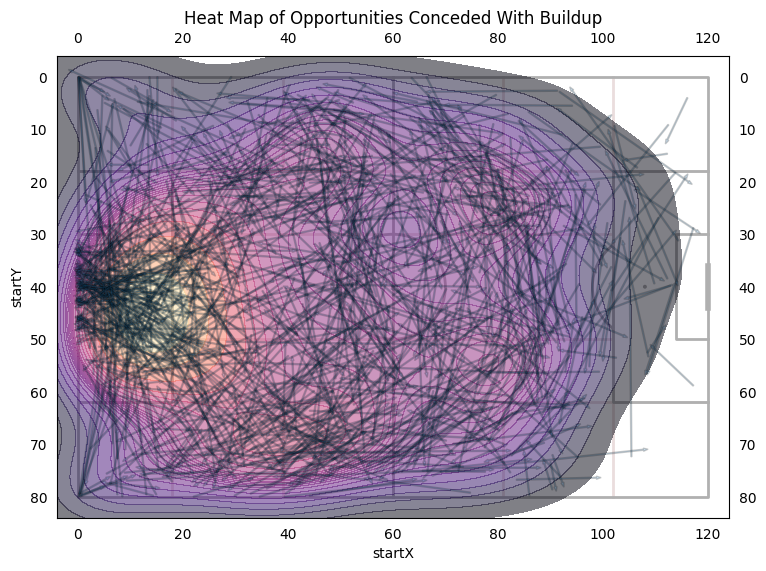

In [9]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [79]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    if i in [13,29,39,43,122,133]:
        continue
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded Origins')

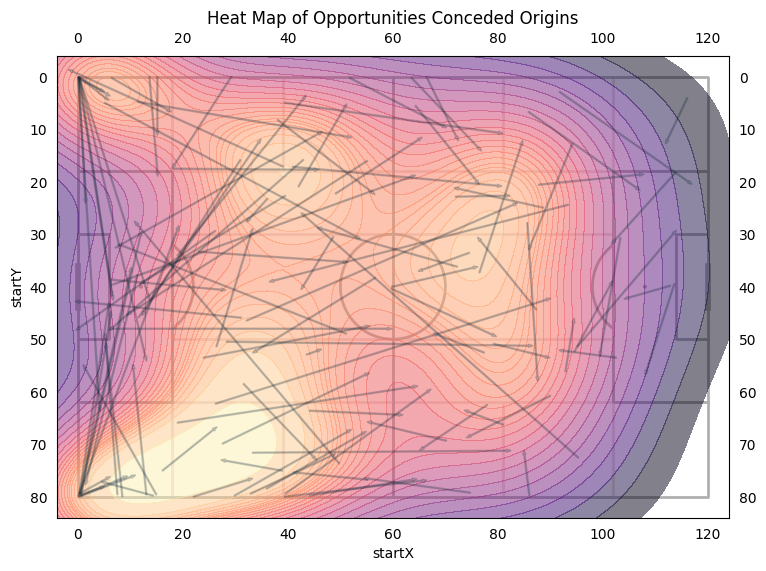

In [11]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded Origins")

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded Origins (No Set Pieces)')

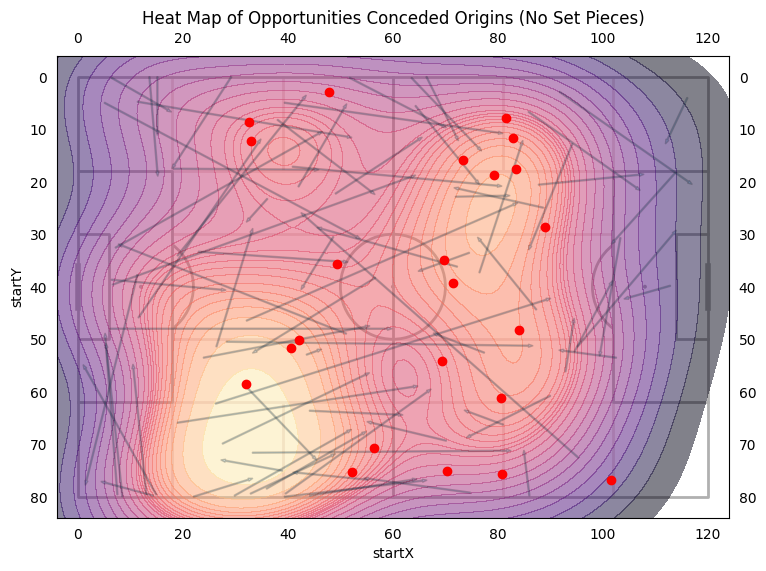

In [87]:
originsWithoutSetPieces = origins[origins.get("Event")!="Set Piece"]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=originsWithoutSetPieces.get("startX"),y=originsWithoutSetPieces.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(originsWithoutSetPieces.shape[0]):
    row = originsWithoutSetPieces.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"),'ro')
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded Origins (No Set Pieces)")

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded Set Pieces')

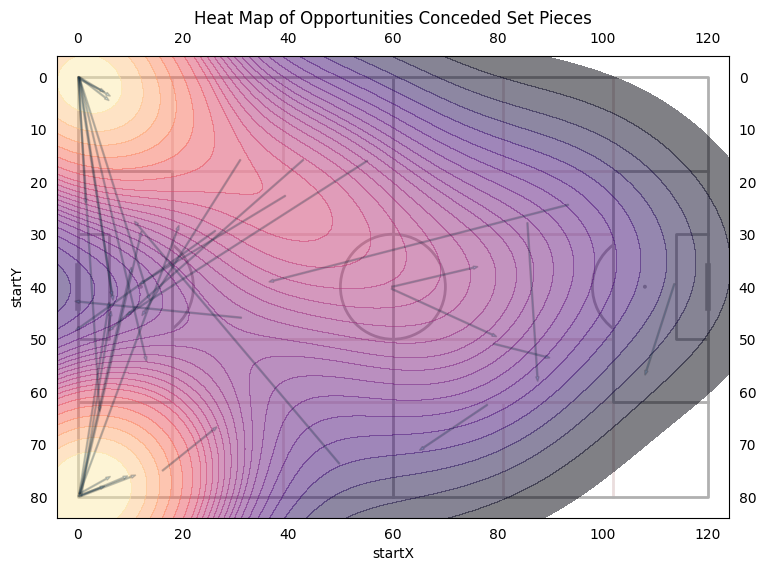

In [13]:
originsSetPieces = origins[origins.get("Event")=="Set Piece"]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=originsSetPieces.get("startX"),y=originsSetPieces.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(originsSetPieces.shape[0]):
    row = originsSetPieces.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded Set Pieces")

Text(0.5, 1.0, 'Heat Map of Opportunities Off of Misplayed Passses Starting Location')

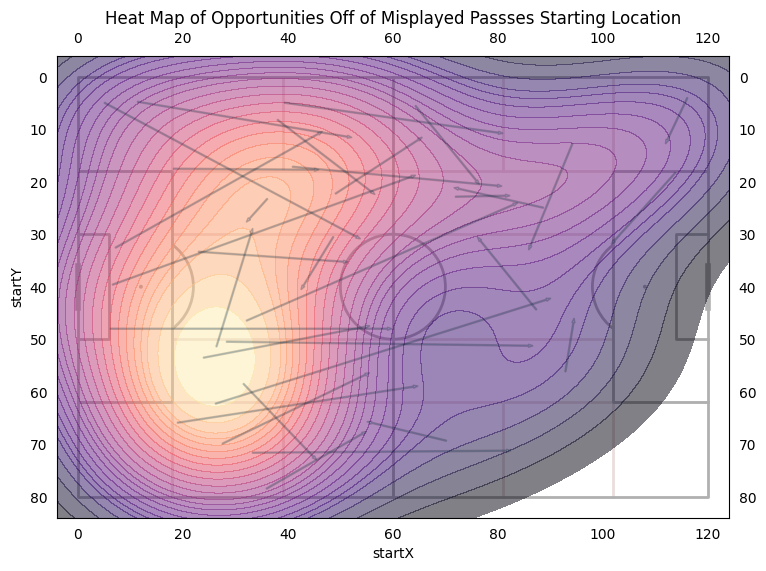

In [14]:
originsUCSDMistakes = opportunities[(opportunities.get("Team")=="UCSD")&(origins.get("Event")=="Pass")]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=originsUCSDMistakes.get("startX"),y=originsUCSDMistakes.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(originsUCSDMistakes.shape[0]):
    row = originsUCSDMistakes.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Off of Misplayed Passses Starting Location")

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded Off Tackles')

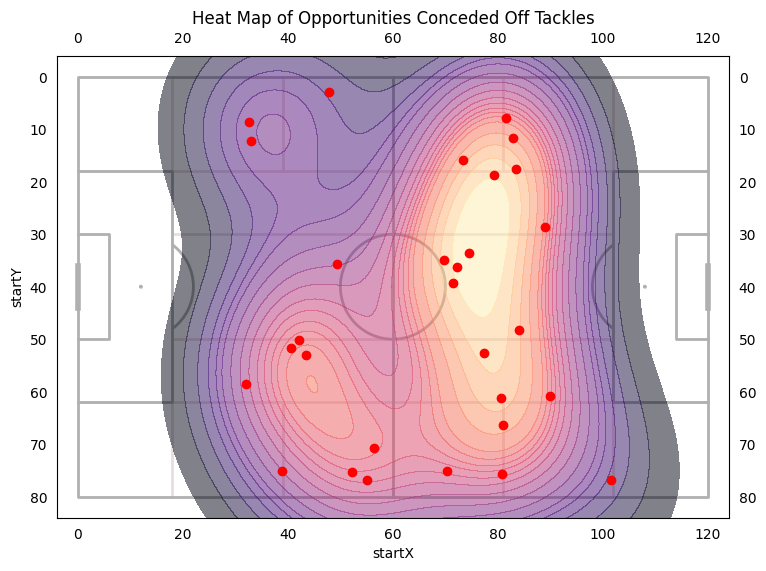

In [15]:
originsTackles = origins[(origins.get("Event")=="Tackle")&(origins.get("Team")!="UCSD")]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=originsTackles.get("startX"),y=originsTackles.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 20,cmap = "magma")

for i in range(originsTackles.shape[0]):
    row = originsTackles.iloc[i]
    plt.plot(row.get("startX"),row.get("startY"),'ro')
plt.title("Heat Map of Opportunities Conceded Off Tackles")

Text(0.5, 1.0, 'Opponent Chances Origin')

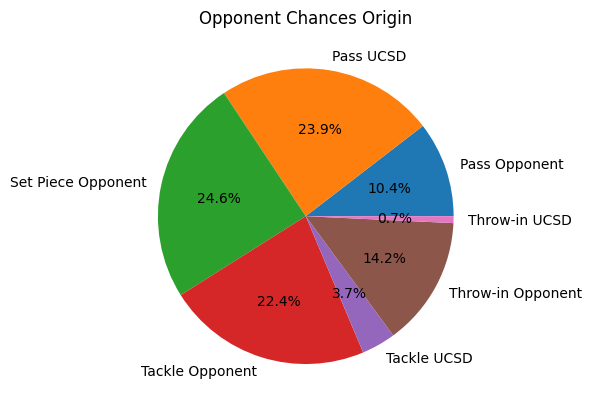

In [107]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Chances Origin")

27

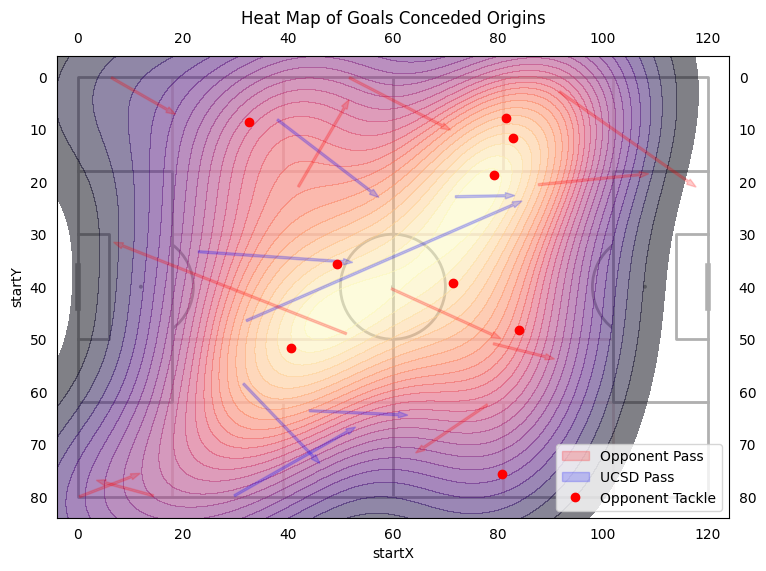

In [16]:
originsGoals = origins[origins.get("resultGoal")]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=originsGoals.get("startX"),y=originsGoals.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(originsGoals.shape[0]):
    row = originsGoals.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        if team == "UCSD":
            color = "ob"
        else:
            color = "ro"
        plt.plot(row.get("startX"),row.get("startY"),color,label = team+ " Tackle")
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " Pass")
plt.title("Heat Map of Goals Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
originsGoals.shape[0]

Text(0.5, 1.0, 'Opponent Goals Origin')

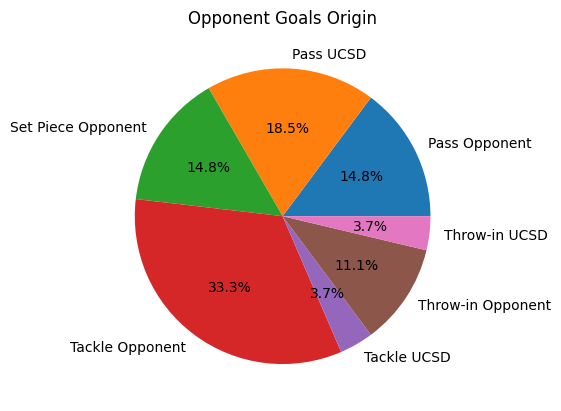

In [109]:
originGoalCounts = originsGoals.groupby(["Event","Team"]).count().reset_index()
labels = originGoalCounts.get("Event") + " "+originGoalCounts.get("Team")
plt.pie(originGoalCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Goals Origin")

Text(0.5, 1.0, 'Heat Map of Conceded Shots')

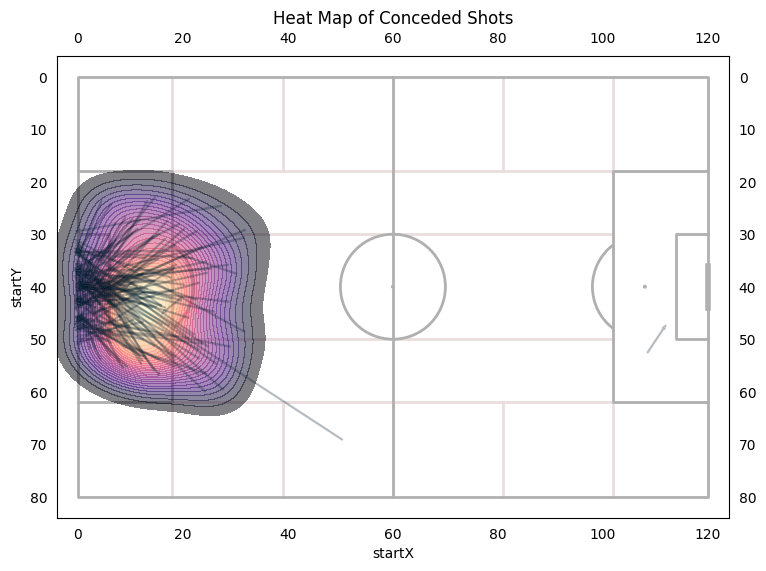

In [110]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shots.get("startX"),y=shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 30,cmap = "magma")

for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Conceded Shots")

Text(0.5, 1.0, 'Heat Map of Conceded Shots')

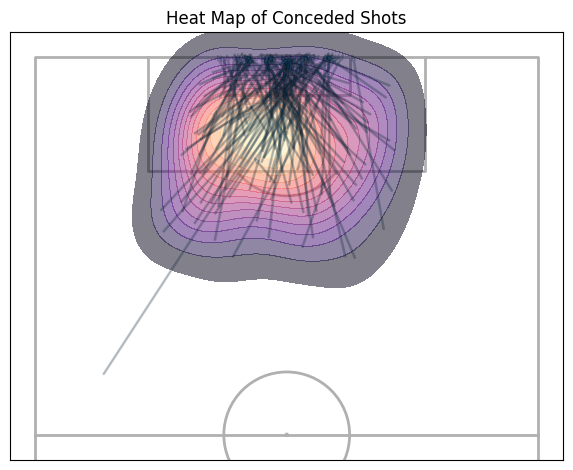

In [113]:
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 15,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .2)
plt.title("Heat Map of Conceded Shots")

Text(0.5, 1.0, 'Heat Map of Conceded Goals')

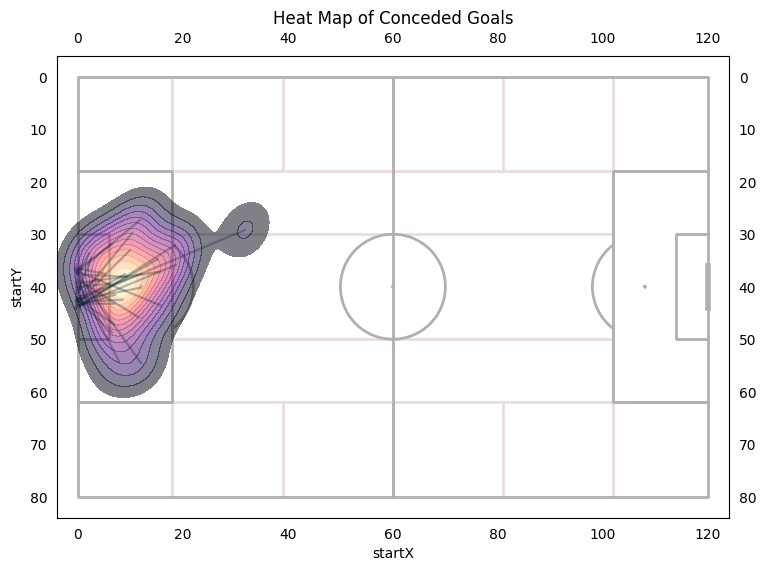

In [18]:
goals = opportunities[(opportunities.get("Event").apply(lambda event: "Shot" in event))& (opportunities.get("Result") == "Successful")]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=goals.get("startX"),y=goals.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 15,cmap = "magma")

for i in range(goals.shape[0]):
    row = goals.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Conceded Goals")

Text(0.5, 1.0, 'Heat Map of Conceded Goals')

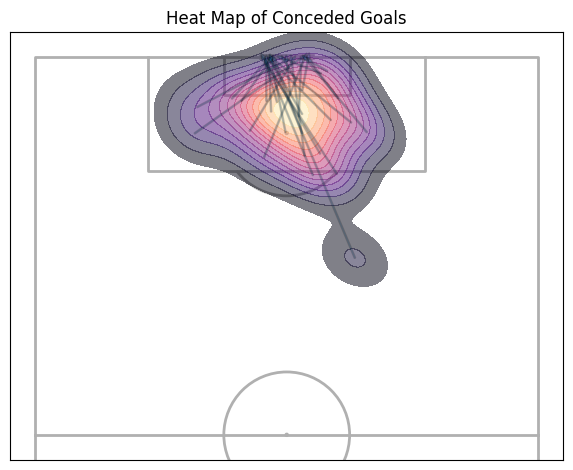

In [114]:
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-goals.get("startX"),x=80-goals.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 15,cmap = "magma")
for i in range(goals.shape[0]):
    row = goals.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .2)
plt.title("Heat Map of Conceded Goals")

0.8888888888888888


Text(0.5, 1.0, 'Heat Map of Conceded Shots')

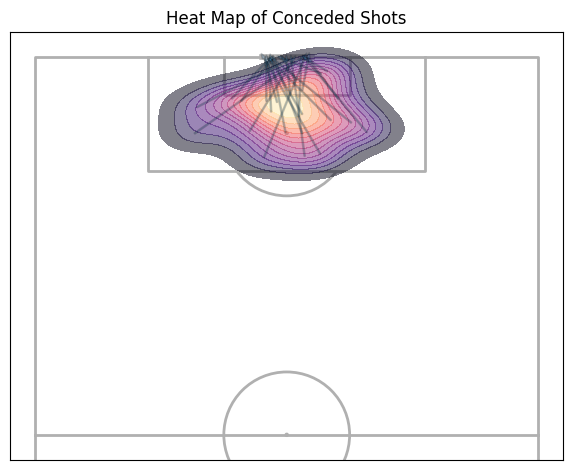

In [120]:
oppBoxShots = goals[(goals.get("startX")<18)&(goals.get("startY")<62)&(goals.get("startY")>18)]
print(oppBoxShots.shape[0]/goals.shape[0])
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-oppBoxShots.get("startX"),x=80-oppBoxShots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 15,cmap = "magma")
for i in range(oppBoxShots.shape[0]):
    row = oppBoxShots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .2)
plt.title("Heat Map of Conceded Shots")

Text(0.5, 1.0, 'Opponent Deep Completed Passes')

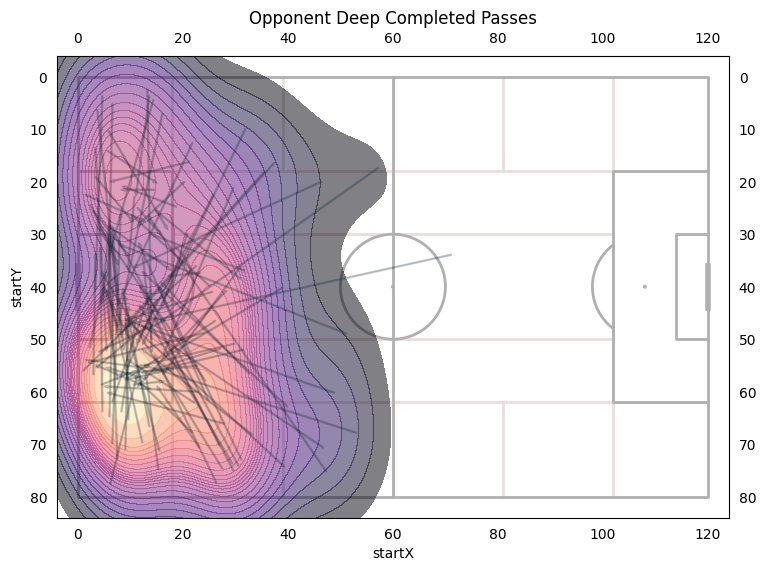

In [21]:
oppPasses = opportunities[(opportunities.get("Event") =="Pass")&(opportunities.get("Team")!="UCSD")]
oppDeepPasses = oppPasses[(oppPasses.get("endX")<18)&(oppPasses.get("endY")<62)&(oppPasses.get("endY")>18)]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=oppDeepPasses.get("startX"),y=oppDeepPasses.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(oppDeepPasses.shape[0]):
    row = oppDeepPasses.iloc[i]
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Opponent Deep Completed Passes")

In [22]:
oppDeepPasses.shape[0]/12

8.5

Text(0.5, 1.0, 'Opponent Deep Completed Passes')

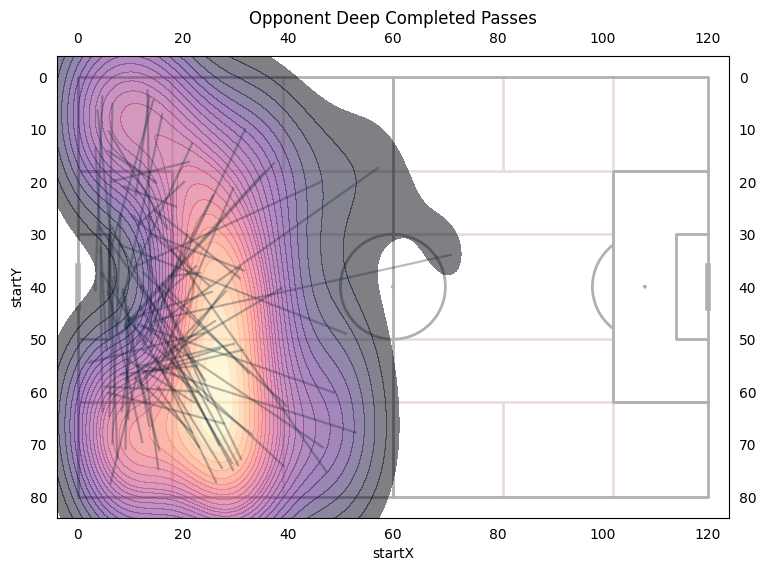

In [23]:
oppPassesBox = oppPasses[(oppPasses.get("endX")<18)&(oppPasses.get("endY")<62)&(oppPasses.get("endY")>18)&(~((oppPasses.get("startX")<18)&(oppPasses.get("startY")<62)&(oppPasses.get("startY")>18)))]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=oppPassesBox.get("startX"),y=oppPassesBox.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(oppPassesBox.shape[0]):
    row = oppPassesBox.iloc[i]
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Opponent Deep Completed Passes")

In [160]:
passes = opportunities.groupby(["numOpportunity","Event"]).count().reset_index()
passes = passes[passes.get("Event")=="Pass"]
passes.head(60)

,numOpportunity,Event,index,Game,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Side,resultGoal
0,0.0,Pass,2,2,2,2,2,2,2,2,2,2,2,2
2,1.0,Pass,11,11,11,11,11,11,11,11,11,11,11,11
4,2.0,Pass,4,4,4,4,4,4,4,4,4,4,4,4
8,3.0,Pass,3,3,3,3,3,3,3,3,3,3,3,3
11,4.0,Pass,9,9,9,9,9,9,9,9,9,9,9,9
13,5.0,Pass,9,9,9,9,9,9,9,9,9,9,9,9
15,6.0,Pass,4,4,4,4,4,4,4,4,4,4,4,4
18,7.0,Pass,5,5,5,5,5,5,5,5,5,5,5,5
21,8.0,Pass,5,5,5,5,5,5,5,5,5,5,5,5
24,9.0,Pass,10,10,10,10,10,10,10,10,10,10,10,10


6.511111111111111

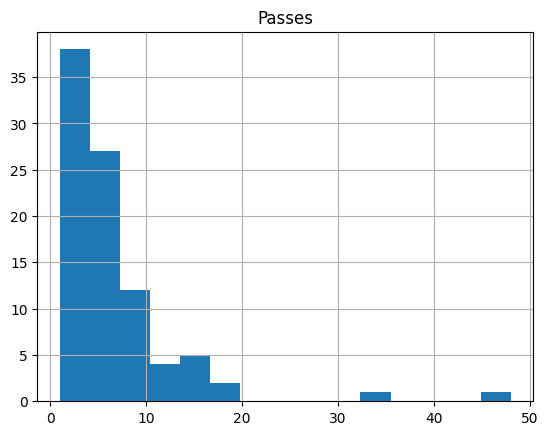

In [42]:
passesNoGoal = passes[~passes.get("resultGoal")]
passesNoGoal = passesNoGoal.groupby(["numOpportunity"]).count()
passesNoGoal = passesNoGoal.assign(Passes = passesNoGoal.get("Event")).get(["Passes"])
passesNoGoal.hist(bins=15)
passesNoGoal.get("Passes").mean()

In [142]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
assists = shotAssists[shotAssists.get("Shot result")=="Successful"]
shotAssistsNoTackles = shotAssists[shotAssists.get("Event") != "Tackle"]
shotAssistsTackles = shotAssists[shotAssists.get("Event") == "Tackle"]
assists

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result
1,1.0,Irvine,Opponent,Pass,Successful,29.238095,49.333333,22.380952,38.857143,Successful
4,4.0,Irvine,Opponent,Pass,Successful,3.333333,19.047619,10.000000,27.047619,Successful
5,5.0,Irvine,Opponent,Pass,Successful,28.476190,8.952381,38.190476,29.523810,Successful
13,14.0,UC Davis,UCSD,Tackle,Successful,7.523810,40.000000,121.000000,81.000000,Successful
14,15.0,UC Davis,UCSD,Tackle,Unsuccessful,7.714286,40.761905,121.000000,81.000000,Successful
20,21.0,CSUN,Opponent,Pass,Successful,84.857143,20.761905,28.095238,32.761905,Successful
26,25.0,CSUN,Opponent,Pass,Successful,2.952381,56.761905,3.333333,34.476190,Successful
29,28.0,UC Riverside,Opponent,Pass,Successful,23.333333,37.333333,18.000000,37.904762,Successful
30,30.0,UC Riverside,Opponent,Pass,Successful,22.571429,36.000000,8.476190,48.571429,Successful
37,38.0,Cal Poly,Opponent,Tackle,Successful,40.666667,51.619048,121.000000,81.000000,Successful


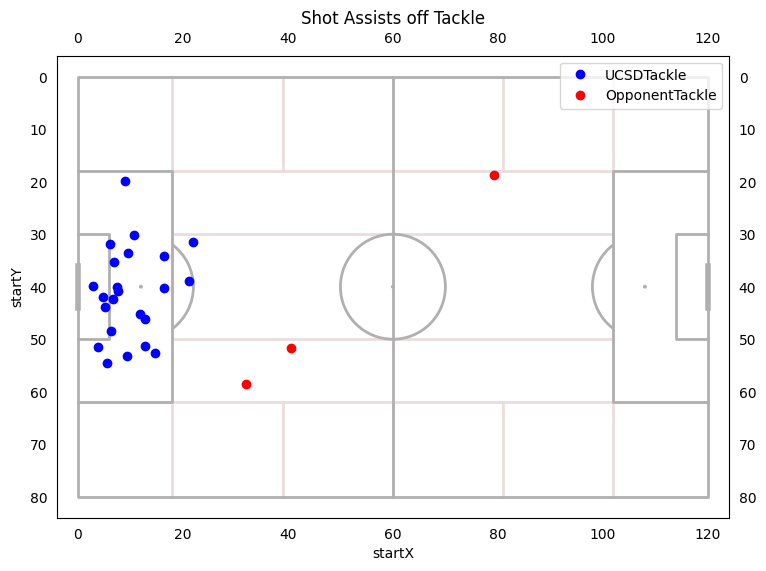

In [135]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssistsTackles.get("startX"),y=shotAssistsNoTackles.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 40,cmap = "magma")
for i in range(shotAssistsTackles.shape[0]):
    row = shotAssistsTackles.iloc[i]
    team = row.get("Team")
    if team == "Opponent":
        color = "Red"
    else:
        color = "Blue"
    
    if row.get("Event") == "Tackle":
        if color == "Red":
            color = "ro"
        else: 
            color = "ob"
        plt.plot(row.get("startX"),row.get("startY"),color,label = row.get("Team")+"Tackle")
    else:
        if row.get("endX") == -1:
            print(row.get("numOpportunity"), "-1")
        plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists off Tackle")
plt.show()

In [136]:
print(shotAssistsTackles.shape[0]/shotAssists.shape[0], shotAssistsNoTackles.shape[0]/shotAssists.shape[0])

0.19117647058823528 0.8088235294117647


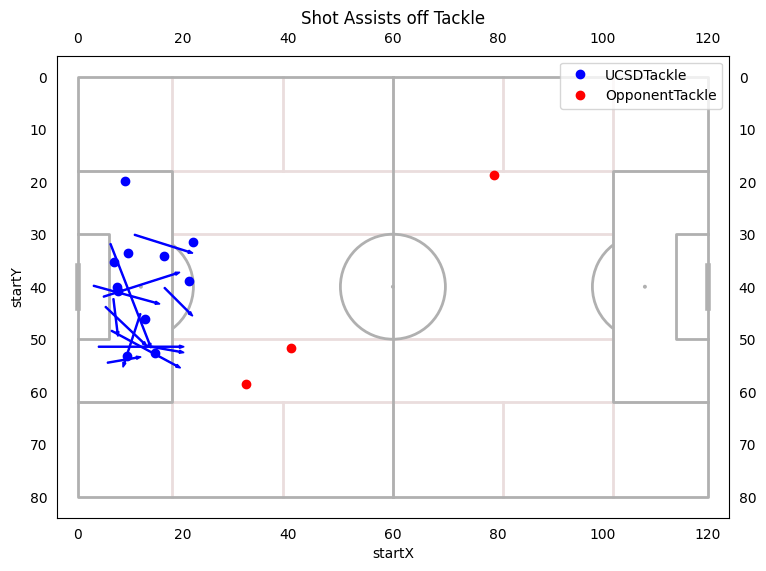

In [141]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssistsTackles.get("startX"),y=shotAssistsNoTackles.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 40,cmap = "magma")
for i in range(shotAssistsTackles.shape[0]):
    row = shotAssistsTackles.iloc[i]
    team = row.get("Team")
    if team == "Opponent":
        color = "Red"
    else:
        color = "Blue"
    
    if row.get("endX") == -1 or row.get("endX") ==121:
        if color == "Red":
            color = "ro"
        else: 
            color = "ob"
        plt.plot(row.get("startX"),row.get("startY"),color,label = row.get("Team")+"Tackle")
    else:
        plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,color = color)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists off Tackle")
plt.show()

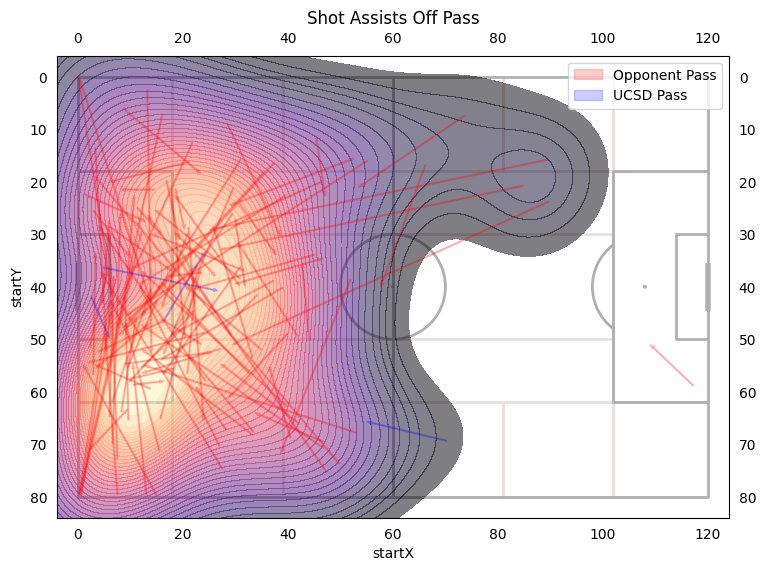

In [157]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssistsNoTackles.get("startX"),y=shotAssistsNoTackles.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 40,cmap = "magma")
for i in range(shotAssistsNoTackles.shape[0]):
    row = shotAssistsNoTackles.iloc[i]
    team = row.get("Team")
    if team == "Opponent":
        color = "Red"
    else:
        color = "Blue"
    
    if row.get("Event") == "Tackle":
        if color == "Red":
            color = "ro"
        else: 
            color = "ob"
        plt.plot(row.get("startX"),row.get("startY"),color,label = row.get("Team")+"Tackle")
    else:
        if row.get("endX") == -1:
            print(row.get("numOpportunity"), "-1")
        plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2,color = color,label = team+ " Pass")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists Off Pass")
plt.show()

In [152]:
assists[(assists.get("endX")<18)&(assists.get("endY")<62)&(assists.get("endY")>18)].shape[0]/assists.shape[0]

0.5925925925925926

In [153]:
assists[assists.get("Event")=="Tackle"].shape[0]/assists.shape[0]

0.2962962962962963